# Importing Datasets

In [1]:
import json

with open('train_data-1573118738755.txt') as json_file:
    tweet = json.load(json_file)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
import seaborn as sns

In [5]:
records = pd.DataFrame(tweet['records'])

In [6]:
records.head(5)

,sentiment_score,stocktwit_tweet,ticker,timestamp
0,3,$AMD going up but hesitating however chart is ...,$AMD,2018-09-19 18:38:28+00:00
1,3,@inforlong @MariaGascon Despite\nChina trade w...,$CAT,2018-10-09 03:51:06+00:00
2,2,$AVGO WTF?,$AVGO,2018-07-12 13:35:32+00:00
3,2,$PH\n New Insider Filing On: \n MULLER KLAUS P...,$PH,2018-07-19 03:32:50+00:00
4,3,$FB if it bounces tommorrow do the right thing...,$FB,2018-08-23 19:07:54+00:00


In [7]:
data = pd.read_csv("train_factors-1573207730757.csv")
data.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
0,1,21/08/18,$NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2
1,2,11/10/18,$WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3
2,3,21/08/18,$DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1
3,4,10/07/18,$ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2
4,5,12/09/18,$FE,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2


In [8]:
data.columns

Index(['Id', 'date', 'ticker', 'SF1', 'SF2', 'SF3', 'SF4', 'SF5', 'SF6', 'SF7',
       'alpha'],
      dtype='object')

In [9]:
data.drop('Id',axis=1,inplace=True)

In [10]:
data.dtypes

date       object
ticker     object
SF1       float64
SF2       float64
SF3       float64
SF4       float64
SF5       float64
SF6       float64
SF7       float64
alpha       int64
dtype: object

In [11]:
data.describe()

,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
count,27006.000000,27006.000000,27006.000000,27006.000000,27006.000000,27006.000000,27006.000000,27006.000000
mean,0.005429,-0.001005,-0.024421,-0.042420,0.041465,0.002597,0.036744,2.379582
std,0.941853,0.996130,0.539555,1.111309,0.976028,0.998839,1.204473,1.008681
min,-4.114670,-4.578587,-2.609150,-6.329798,-5.480268,-4.338751,-5.347869,1.000000
25%,-0.596792,-0.666310,-0.300187,-0.767247,-0.518641,-0.668027,-0.688198,2.000000
50%,0.012104,-0.013257,-0.040786,-0.058629,0.072127,0.007417,0.081374,2.000000
75%,0.611574,0.669094,0.241424,0.677433,0.616538,0.674592,0.807556,3.000000
max,4.415048,3.822270,3.452486,4.907407,4.779911,4.075428,5.182912,4.000000


In [12]:
data['date'] = pd.to_datetime(data['date'])

In [13]:
data.dtypes

date      datetime64[ns]
ticker            object
SF1              float64
SF2              float64
SF3              float64
SF4              float64
SF5              float64
SF6              float64
SF7              float64
alpha              int64
dtype: object

# data visualisation

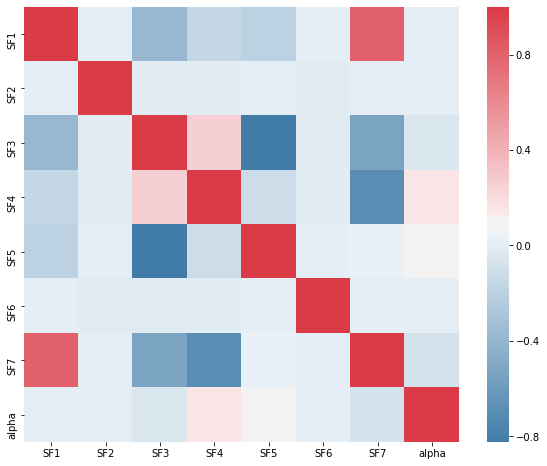

In [14]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

### strong correlation between SF1 & SF7

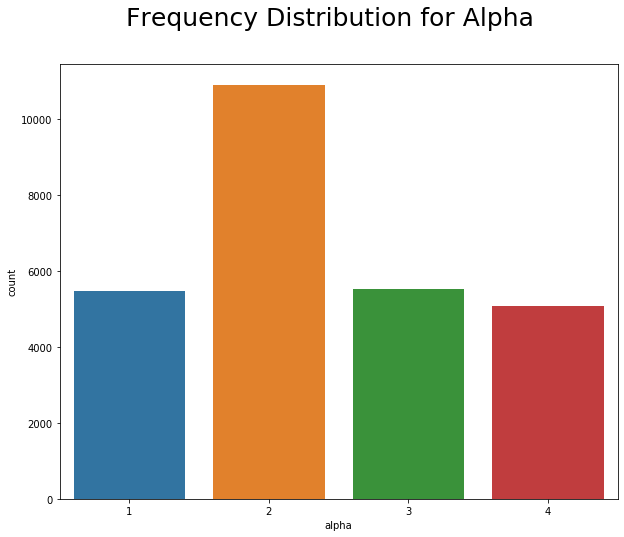

In [691]:
f,ax=plt.subplots(figsize = (10,8))
f.suptitle('Frequency Distribution for Alpha', fontsize = 25)
sns.countplot(data['alpha'])

##### Alpha signal value with 2 is more.

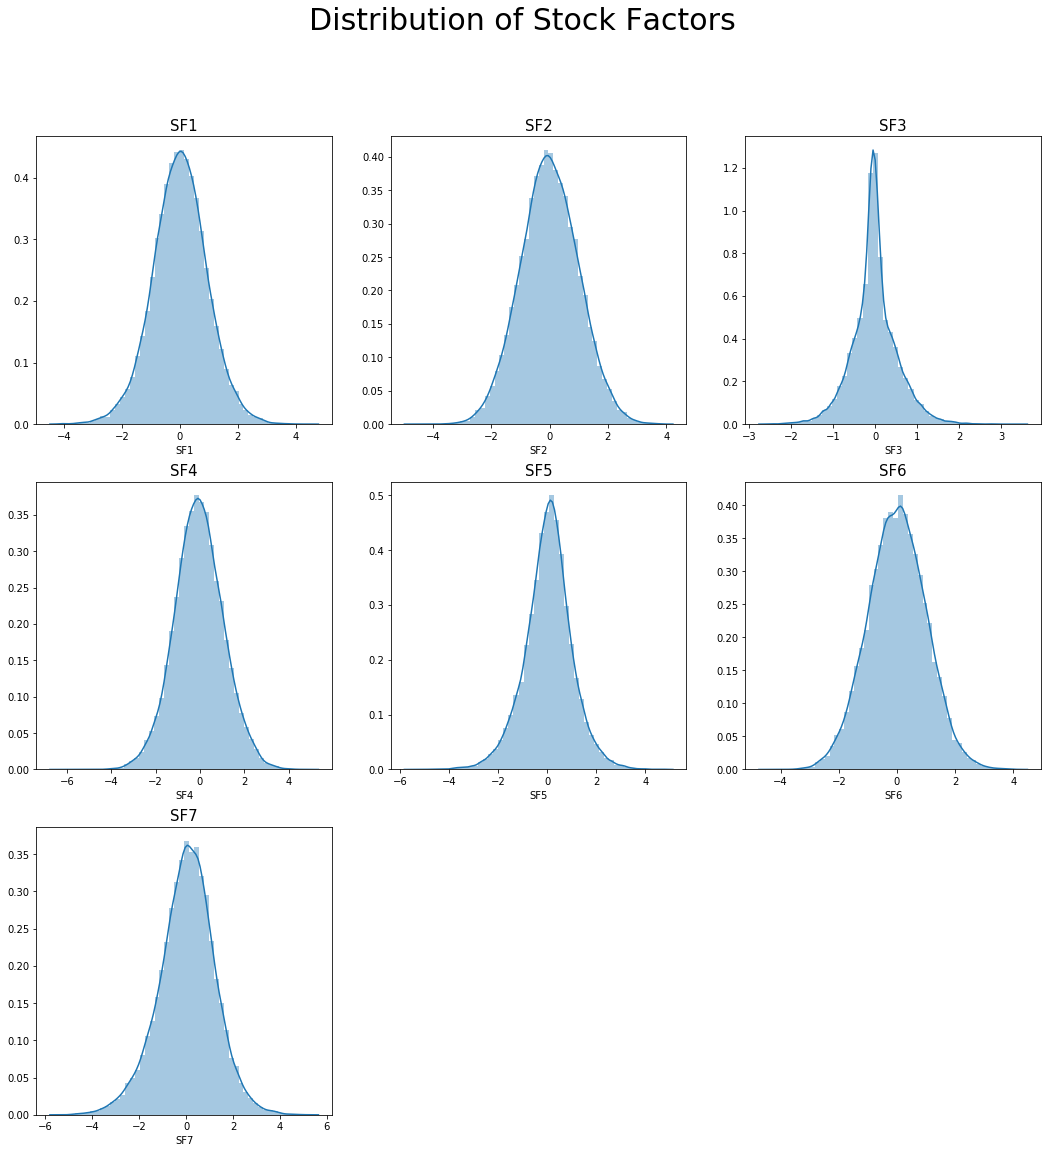

In [676]:
fig, ax = plt.subplots(figsize=(18,18))
fig.suptitle('Distribution of Stock Factors', fontsize = 30)

plt.subplot(331)
ax1 = sns.distplot(data['SF1'])
ax1.set_title('SF1', fontsize = 15)


plt.subplot(332)
ax2 = sns.distplot(data['SF2'])
ax2.set_title('SF2', fontsize = 15)


plt.subplot(333)
ax3 = sns.distplot(data['SF3'])
ax3.set_title('SF3', fontsize = 15)


plt.subplot(334)
ax4 = sns.distplot(data['SF4'])
ax4.set_title('SF4', fontsize = 15)


plt.subplot(335)
ax5 = sns.distplot(data['SF5'])
ax5.set_title('SF5', fontsize = 15)


plt.subplot(336)
ax6 = sns.distplot(data['SF6'])
ax6.set_title('SF6', fontsize = 15)

plt.subplot(337)
ax7 = sns.distplot(data['SF7'])
ax7.set_title('SF7', fontsize = 15)


plt.show()

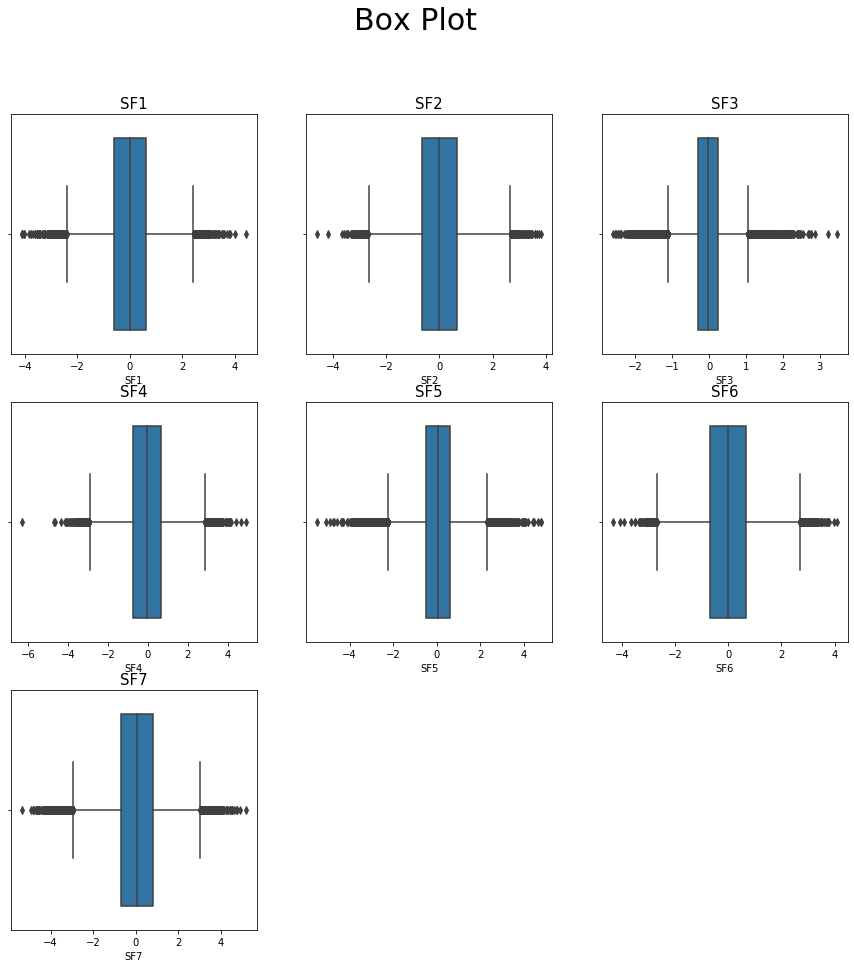

In [682]:
fig, ax = plt.subplots(figsize=(15,15))
fig.suptitle('Box Plot', fontsize = 30)

plt.subplot(331)
ax1 = sns.boxplot(data['SF1'])
ax1.set_title('SF1', fontsize = 15)


plt.subplot(332)
ax2 = sns.boxplot(data['SF2'])
ax2.set_title('SF2', fontsize = 15)


plt.subplot(333)
ax3 = sns.boxplot(data['SF3'])
ax3.set_title('SF3', fontsize = 15)


plt.subplot(334)
ax4 = sns.boxplot(data['SF4'])
ax4.set_title('SF4', fontsize = 15)


plt.subplot(335)
ax5 = sns.boxplot(data['SF5'])
ax5.set_title('SF5', fontsize = 15)


plt.subplot(336)
ax6 = sns.boxplot(data['SF6'])
ax6.set_title('SF6', fontsize = 15)

plt.subplot(337)
ax7 = sns.boxplot(data['SF7'])
ax7.set_title('SF7', fontsize = 15)


plt.show()

# Feature engineering

In [17]:
data['ticker'] = data['ticker'].str.replace('\W', '')
data['ticker']= [text.lower() for text in data['ticker']]
data.head()

,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
0,2018-08-21,ntap,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2
1,2018-11-10,wynn,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3
2,2018-08-21,dri,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1
3,2018-10-07,ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2
4,2018-12-09,fe,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2


In [18]:
data['ticker'].head()

0    ntap
1    wynn
2     dri
3      ge
4      fe
Name: ticker, dtype: object

In [19]:
for cols in ['date','ticker','alpha']:
    data[cols]= data[cols].astype('category')

In [20]:
data.dtypes

date      category
ticker    category
SF1        float64
SF2        float64
SF3        float64
SF4        float64
SF5        float64
SF6        float64
SF7        float64
alpha     category
dtype: object

In [21]:
data.drop('date',axis=1,inplace=True)

In [22]:
data.isnull().sum()

ticker    0
SF1       0
SF2       0
SF3       0
SF4       0
SF5       0
SF6       0
SF7       0
alpha     0
dtype: int64

In [23]:
cat_cols= ['ticker']
data = pd.get_dummies(columns=cat_cols, data=data, 
                      prefix=cat_cols, prefix_sep="_", drop_first=True)

In [24]:
data['alpha'].value_counts()

2    10912
3     5536
1     5467
4     5091
Name: alpha, dtype: int64

# train test split

In [25]:
y=data["alpha"]
X=data.drop('alpha', axis=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify = y)   

# Logistic Rgression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log_r = LogisticRegression()

In [29]:
log_r.fit(X_train,y_train)

C:\Users\AMAN\Anaconda31\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AMAN\Anaconda31\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
log_train_pred = log_r.predict(X_train)
log_test_pred = log_r.predict(X_test)

In [31]:
print('train evaluation')
print(classification_report(y_train,log_train_pred))
print('\n')
print('test evaluation')
print(classification_report(y_test,log_test_pred))

train evaluation
              precision    recall  f1-score   support

           1       0.53      0.21      0.30      4373
           2       0.48      0.84      0.61      8729
           3       0.47      0.37      0.41      4429
           4       0.37      0.10      0.15      4073

    accuracy                           0.48     21604
   macro avg       0.46      0.38      0.37     21604
weighted avg       0.47      0.48      0.42     21604



test evaluation
              precision    recall  f1-score   support

           1       0.44      0.17      0.24      1094
           2       0.45      0.80      0.58      2183
           3       0.43      0.33      0.37      1107
           4       0.21      0.06      0.09      1018

    accuracy                           0.43      5402
   macro avg       0.38      0.34      0.32      5402
weighted avg       0.40      0.43      0.37      5402



# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt_cf = DecisionTreeClassifier()

In [33]:
dt_cf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [34]:
train_dt = dt_cf.predict(X_train)
test_dt = dt_cf.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

In [36]:
cf_train_dt = confusion_matrix(y_train,train_dt)
cf_train_dt

array([[4373,    0,    0,    0],
       [   0, 8729,    0,    0],
       [   0,    0, 4429,    0],
       [   0,    0,    0, 4073]], dtype=int64)

In [37]:
print(accuracy_score(y_train,train_dt))

1.0


In [38]:
print(accuracy_score(y_test,test_dt))

0.646612365790448


In [39]:
print('train evaluation')
print(classification_report(y_train,train_dt))
print('\n')
print('test evaluation')
print(classification_report(y_test,test_dt))

train evaluation
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4373
           2       1.00      1.00      1.00      8729
           3       1.00      1.00      1.00      4429
           4       1.00      1.00      1.00      4073

    accuracy                           1.00     21604
   macro avg       1.00      1.00      1.00     21604
weighted avg       1.00      1.00      1.00     21604



test evaluation
              precision    recall  f1-score   support

           1       0.53      0.50      0.51      1094
           2       0.79      0.85      0.82      2183
           3       0.50      0.47      0.48      1107
           4       0.59      0.57      0.58      1018

    accuracy                           0.65      5402
   macro avg       0.60      0.60      0.60      5402
weighted avg       0.64      0.65      0.64      5402



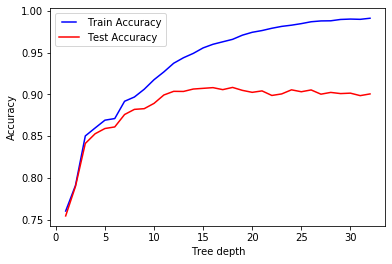

In [40]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)
    
    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

# Decision Tree using GridSearch

In [41]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

In [42]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [10, 20],
              "max_depth": [5, 8, 10],
              "min_samples_leaf": [5, 10],
              "max_leaf_nodes": [10, 20],
              }

In [43]:
clf2 = GridSearchCV(dt_cf, param_grid, cv=kfold)
clf2.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=143, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
      

In [44]:
clf2.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [45]:
clf2_train = clf2.predict(X_train)
clf2_test = clf2.predict(X_test)

In [46]:
print(accuracy_score(y_train,clf2_train))
print(accuracy_score(y_test,clf2_test))

0.6072949453804851
0.5938541281007035


In [47]:
print(classification_report(y_train,clf2_train))

print(classification_report(y_test,clf2_test))

              precision    recall  f1-score   support

           1       0.66      0.39      0.49      4373
           2       0.63      0.95      0.76      8729
           3       0.58      0.40      0.48      4429
           4       0.46      0.33      0.38      4073

    accuracy                           0.61     21604
   macro avg       0.59      0.52      0.53     21604
weighted avg       0.60      0.61      0.58     21604

              precision    recall  f1-score   support

           1       0.65      0.37      0.47      1094
           2       0.63      0.94      0.75      2183
           3       0.56      0.40      0.47      1107
           4       0.43      0.30      0.35      1018

    accuracy                           0.59      5402
   macro avg       0.57      0.50      0.51      5402
weighted avg       0.58      0.59      0.56      5402



# XGBoost

In [48]:
from xgboost import XGBClassifier

In [49]:
XGB = XGBClassifier(n_jobs=-1)
 
# Use a grid over parameters of interest
param_grid = {'colsample_bytree': [0.5,0.8, 0.9],
              'n_estimators':[10,50],
              'max_depth': [5,8,10]
             } 

In [50]:
CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv= kfold)
CV_XGB.fit(X = X_train, y=y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=143, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.5, 0.8, 0.9],
                         'max_dep

In [51]:
# Find best model
best_xgb_model = CV_XGB.best_estimator_
print(CV_XGB.best_score_, CV_XGB.best_params_)

0.697602295871135 {'colsample_bytree': 0.8, 'max_depth': 10, 'n_estimators': 50}


In [52]:
xgb_train_pred=best_xgb_model.predict(X_train)
xgb_test_pred=best_xgb_model.predict(X_test)

In [53]:
print(classification_report(y_train,xgb_train_pred))

print(classification_report(y_test,xgb_test_pred))

              precision    recall  f1-score   support

           1       0.89      0.74      0.81      4373
           2       0.80      0.99      0.89      8729
           3       0.91      0.69      0.78      4429
           4       0.83      0.77      0.80      4073

    accuracy                           0.84     21604
   macro avg       0.86      0.80      0.82     21604
weighted avg       0.85      0.84      0.83     21604

              precision    recall  f1-score   support

           1       0.67      0.54      0.59      1094
           2       0.74      0.96      0.83      2183
           3       0.64      0.45      0.53      1107
           4       0.64      0.58      0.61      1018

    accuracy                           0.70      5402
   macro avg       0.67      0.63      0.64      5402
weighted avg       0.69      0.70      0.68      5402



# Random forest

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt') 

In [171]:
param_grid = {"n_estimators" : [100,150,250],
              "max_depth" : [5,8,10],
              "min_samples_leaf" : [4,6,8,10],
             "min_samples_split": [2, 10, 20]}

rf_grid = GridSearchCV(rfc, param_grid=param_grid, cv=kfold)

In [172]:
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=143, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
            

In [173]:
rf_train_pred = rf_grid.predict(X_train)
rf_test_pred = rf_grid.predict(X_test)

In [174]:
print('train evaluation')
print(classification_report(y_train,rf_train_pred))
print('\n')
print('test evaluation')
print(classification_report(y_test,rf_test_pred))

train evaluation
              precision    recall  f1-score   support

           1       0.74      0.19      0.30      4373
           2       0.44      0.99      0.61      8729
           3       0.69      0.14      0.23      4429
           4       1.00      0.00      0.00      4073

    accuracy                           0.47     21604
   macro avg       0.72      0.33      0.29     21604
weighted avg       0.66      0.47      0.36     21604



test evaluation
              precision    recall  f1-score   support

           1       0.73      0.19      0.30      1094
           2       0.44      0.99      0.61      2183
           3       0.58      0.11      0.18      1107
           4       0.00      0.00      0.00      1018

    accuracy                           0.46      5402
   macro avg       0.44      0.32      0.27      5402
weighted avg       0.45      0.46      0.34      5402



# Sentiment

In [54]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn

import warnings
warnings.filterwarnings("ignore")

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
from nltk.stem.snowball import SnowballStemmer


In [57]:
import re

In [58]:
pd.value_counts(records['sentiment_score'])

2    464402
3    208031
4    153905
1    120771
0     92022
Name: sentiment_score, dtype: int64

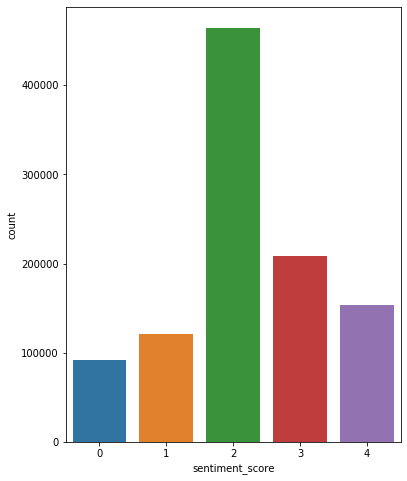

In [695]:
plt.subplots(figsize=(6,8))
sns.countplot(records['sentiment_score'])

##### Sentiment score of 2 is more

In [60]:
records.isnull().sum()

sentiment_score    0
stocktwit_tweet    0
ticker             0
timestamp          0
dtype: int64

In [62]:
records.tail()

,sentiment_score,stocktwit_tweet,ticker,timestamp
1039126,2,$CLF https://twitter.com/hrdrckminer/status/10...,$CLF,2018-08-13 22:15:04+00:00
1039127,3,$AMD 🔥🔥🔥,$AMD,2018-09-04 15:25:59+00:00
1039128,0,$FB damn should of shorted 196 after hours to ...,$FB,2018-07-25 21:29:03+00:00
1039129,0,$AMD back to the 31&#39;s,$AMD,2018-09-28 16:19:55+00:00
1039130,2,$AMZN Lagging other tech today.,$AMZN,2018-07-05 17:14:00+00:00


In [63]:
records['stocktwit_tweet'] = [entry.lower() for entry in records['stocktwit_tweet']]
print(records['stocktwit_tweet'].head())

0    $amd going up but hesitating however chart is ...
1    @inforlong @mariagascon despite\nchina trade w...
2                                           $avgo wtf?
3    $ph\n new insider filing on: \n muller klaus p...
4    $fb if it bounces tommorrow do the right thing...
Name: stocktwit_tweet, dtype: object


# text contraction

In [64]:
contractions = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [65]:
def expand_contractions(text):
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
    return text

In [66]:
records['stocktwit_tweet'] = [expand_contractions(re.sub('’', "'", text)) for text in records['stocktwit_tweet']]

# text cleaning

In [67]:
records['ticker'] = records['ticker'].str.replace('\W', '')
records['ticker']= [text.lower() for text in records['ticker']]

In [68]:
def scrub_words(text):
    text = re.sub('[$|@](\w)*[\s]',' ',text) ## removing tagged words
    text = re.sub('\n',' ',text) ### removing new line character
    text = re.sub('(?P<url>https?://[^\s]+)',' ',text) ### removing http links
    text = re.sub("(\\W|\\d)",' ',text) ### removing non alphanumeric and digits
    text = re.sub("[ha]{4}", ' ',text) 
    text = re.sub("\s+", ' ', text) ### removing extra white spaces
    
    return text

In [69]:
records['stocktwit_tweet'] = [scrub_words(text) for text in records['stocktwit_tweet']]

In [70]:
records.head()

,sentiment_score,stocktwit_tweet,ticker,timestamp
0,3,going up but hesitating however chart is very...,amd,2018-09-19 18:38:28+00:00
1,3,despite china trade war held very well,cat,2018-10-09 03:51:06+00:00
2,2,wtf,avgo,2018-07-12 13:35:32+00:00
3,2,new insider filing on muller klaus peter tran...,ph,2018-07-19 03:32:50+00:00
4,3,if it bounces tommorrow do the right thing an...,fb,2018-08-23 19:07:54+00:00


In [71]:
#records['stocktwit_tweet'] = [word_tokenize(entry) for entry in records['stocktwit_tweet']]
##print(records['stocktwit_tweet'].head())

In [72]:
#records.head()

### stopword removal

In [73]:
snowball=SnowballStemmer('english')
stopword_list = stopwords.words('english')

In [74]:
def remove_stopwords(text):
    
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [75]:
records['stocktwit_tweet']=records['stocktwit_tweet'].apply(remove_stopwords)
records.head()

,sentiment_score,stocktwit_tweet,ticker,timestamp
0,3,going hesitating however chart stable going up...,amd,2018-09-19 18:38:28+00:00
1,3,despite china trade war held well,cat,2018-10-09 03:51:06+00:00
2,2,wtf,avgo,2018-07-12 13:35:32+00:00
3,2,new insider filing muller klaus peter transact...,ph,2018-07-19 03:32:50+00:00
4,3,bounces tommorrow right thing gtfo,fb,2018-08-23 19:07:54+00:00


# lemmatizing


In [76]:
from nltk import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [77]:
records['stocktwit_tweet'] = records['stocktwit_tweet'].apply(lambda x: x.split())

In [78]:
records['stocktwit_tweet'] = records['stocktwit_tweet'].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

In [81]:
records['stocktwit_tweet'] = records['stocktwit_tweet'].apply(lambda x: ' '.join(x))


In [82]:
records.head()

,sentiment_score,stocktwit_tweet,ticker,timestamp
0,3,going hesitating however chart stable going up...,amd,2018-09-19 18:38:28+00:00
1,3,despite china trade war held well,cat,2018-10-09 03:51:06+00:00
2,2,wtf,avgo,2018-07-12 13:35:32+00:00
3,2,new insider filing muller klaus peter transact...,ph,2018-07-19 03:32:50+00:00
4,3,bounce tommorrow right thing gtfo,fb,2018-08-23 19:07:54+00:00


# sentiment eda

In [175]:
records['sentiment_score'].value_counts()

2    464402
3    208031
4    153905
1    120771
0     92022
Name: sentiment_score, dtype: int64

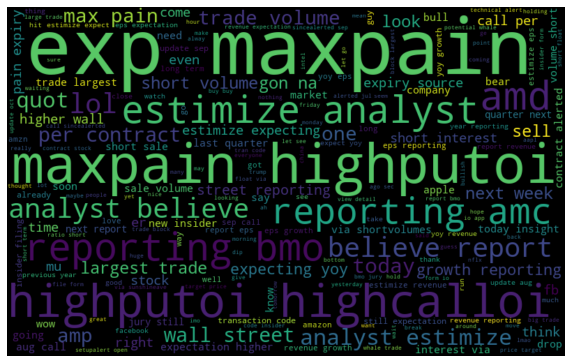

In [83]:
all_words = ' '.join([text for text in records['stocktwit_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

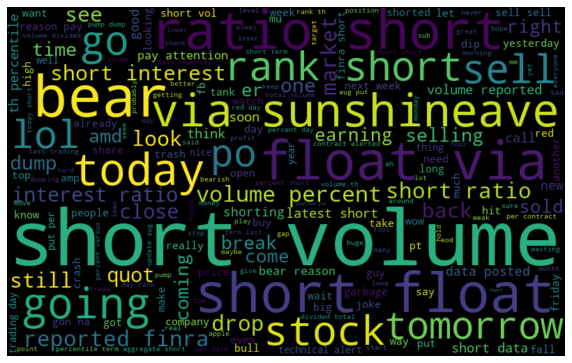

In [84]:

normal_words_0 =' '.join([text for text in records['stocktwit_tweet'][records['sentiment_score'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words_0)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

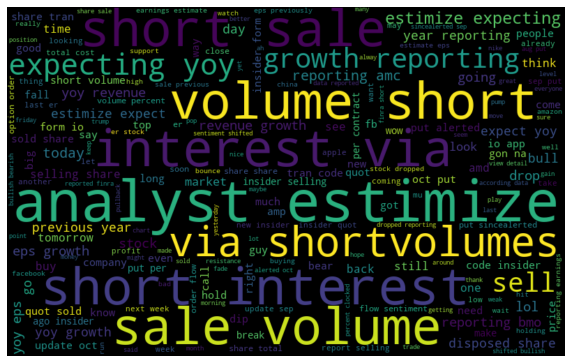

In [85]:
normal_words_1 =' '.join([text for text in records['stocktwit_tweet'][records['sentiment_score'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words_1)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

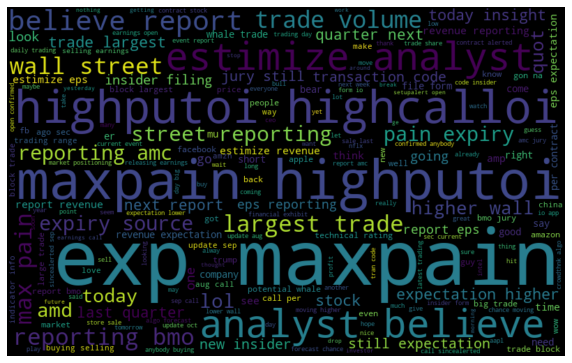

In [86]:
normal_words_2 =' '.join([text for text in records['stocktwit_tweet'][records['sentiment_score'] == 2]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words_2)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

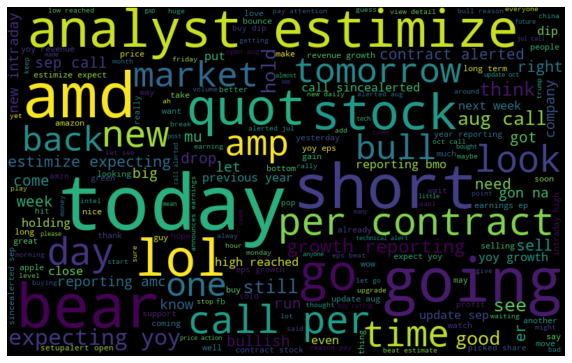

In [87]:
normal_words_3 =' '.join([text for text in records['stocktwit_tweet'][records['sentiment_score'] == 3]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words_3)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


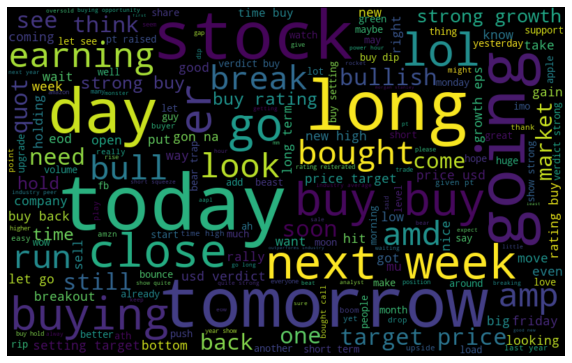

In [88]:
normal_words_4 =' '.join([text for text in records['stocktwit_tweet'][records['sentiment_score'] == 4]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words_4)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# text classification using TFIDF

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Sentiment Analysis using CNN

In [90]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [91]:
from keras.layers import Input, Flatten
from keras.layers import Conv1D

In [92]:
tweets = np.array(records['stocktwit_tweet'])
sentiments = np.array(records['sentiment_score'])

In [93]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets)
word_Index = tokenizer.word_index
vocab_Size = len(word_Index) + 1
print('Found %s unique tokens.' % vocab_Size)

Found 78031 unique tokens.


In [95]:
X = tokenizer.texts_to_sequences(tweets)

In [98]:
from keras.preprocessing.sequence import pad_sequences

In [99]:
#X = sequence.pad_sequences(X)
MAX_SEQUENCE_LENGTH = 15

X = pad_sequences(X)

print('Shape of data tensor:', X.shape)

Shape of data tensor: (1039131, 91)


In [100]:
X

array([[   0,    0,    0, ..., 2193,   13, 1095],
       [   0,    0,    0, ...,  445,  605,  118],
       [   0,    0,    0, ...,    0,    0,  376],
       ...,
       [   0,    0,    0, ...,  714,  176,  637],
       [   0,    0,    0, ...,    0,    0,   18],
       [   0,    0,    0, ..., 2249,  270,    4]])

In [101]:
from keras.utils import to_categorical

In [102]:
sentiment_dum = to_categorical(sentiments)
sentiment_dum

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [103]:
X_train_sent,X_test_sent,y_train_sent,y_test_sent=train_test_split(X,sentiment_dum,test_size=0.3,random_state=42)


In [104]:
embedding_layer = Embedding(vocab_Size,
                            100,
                            input_length=X.shape[1])

In [105]:
embedding_vector_length = 100

model = Sequential()
model.add(Embedding(vocab_Size, embedding_vector_length, input_length = X.shape[1]))
model.add(Dropout(0.2))
model.add(Conv1D(50, 3, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 91, 100)           7803100   
_________________________________________________________________
dropout_1 (Dropout)          (None, 91, 100)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 89, 50)            15050     
_________________________________________________________________
flatten_1 (Flatten)          (None, 4450)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                284864    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                

In [106]:
model.fit(X_train_sent, y_train_sent, validation_data=(X_test_sent, y_test_sent), epochs=3, batch_size=10000)

Train on 727391 samples, validate on 311740 samples
Epoch 1/3
727391/727391 [==============================] - 417s 573us/step - loss: 1.3561 - accuracy: 0.4547 - val_loss: 1.1649 - val_accuracy: 0.5021
Epoch 2/3
727391/727391 [==============================] - 366s 503us/step - loss: 1.0808 - accuracy: 0.5580 - val_loss: 0.9771 - val_accuracy: 0.6096
Epoch 3/3
727391/727391 [==============================] - 404s 555us/step - loss: 0.9753 - accuracy: 0.6313 - val_loss: 0.9163 - val_accuracy: 0.6568


In [107]:
scores = model.evaluate(X_test_sent, y_test_sent, verbose=0)

print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 65.68%


# LSTM

In [108]:
#embed_dim = 128
#lstm_out = 64

model2 = Sequential()
model2.add(Embedding(vocab_Size, embedding_vector_length, input_length = X.shape[1]))
model2.add(Dropout(0.2))
model2.add(LSTM(64))
model2.add(Dense(5, activation='softmax'))
model2.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 91, 100)           7803100   
_________________________________________________________________
dropout_3 (Dropout)          (None, 91, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 7,845,665
Trainable params: 7,845,665
Non-trainable params: 0
_________________________________________________________________
None


In [739]:
model2.fit(X_train_sent, y_train_sent, validation_data=(X_test_sent, y_test_sent), epochs=70, batch_size=10000)

Train on 727391 samples, validate on 311740 samples
Epoch 1/70
727391/727391 [==============================] - 1092s 2ms/step - loss: 0.8563 - accuracy: 0.6762 - val_loss: 0.8837 - val_accuracy: 0.6668
Epoch 2/70
727391/727391 [==============================] - 1080s 1ms/step - loss: 0.8304 - accuracy: 0.6848 - val_loss: 0.8750 - val_accuracy: 0.6697
Epoch 3/70
727391/727391 [==============================] - 1345s 2ms/step - loss: 0.8109 - accuracy: 0.6915 - val_loss: 0.8707 - val_accuracy: 0.6711
Epoch 4/70
727391/727391 [==============================] - 1088s 1ms/step - loss: 0.7938 - accuracy: 0.6980 - val_loss: 0.8692 - val_accuracy: 0.6722
Epoch 5/70
727391/727391 [==============================] - 1095s 2ms/step - loss: 0.7801 - accuracy: 0.7033 - val_loss: 0.8704 - val_accuracy: 0.6744
Epoch 6/70
727391/727391 [==============================] - 1102s 2ms/step - loss: 0.7677 - accuracy: 0.7071 - val_loss: 0.8699 - val_accuracy: 0.6736
Epoch 7/70
727391/727391 [================

In [740]:
scores2 = model2.evaluate(X_test_sent, y_test_sent, verbose=0)

print("Accuracy: %.2f%%" % (scores2[1]*100))

Accuracy: 66.28%


# Final data

In [533]:

with open('train_data-1573118738755.txt') as json_file:
    retweet = json.load(json_file)

In [534]:
records_copy = pd.DataFrame(retweet['records'])

In [535]:
data_copy = pd.read_csv("train_factors-1573207730757.csv")


In [536]:
data_copy['ticker'] = data_copy['ticker'].str.replace('\W', '')
data_copy['ticker']= [text.lower() for text in data_copy['ticker']]

In [537]:
records_copy['ticker'] = records_copy['ticker'].str.replace('\W', '')
records_copy['ticker']= [text.lower() for text in records_copy['ticker']]

### extracting date from timstamp

In [538]:
records_copy['date'] = records_copy['timestamp'].apply(lambda x: x.split()[0])

In [539]:
records_copy['date'] = pd.to_datetime(records_copy['date'])
data_copy['date'] = pd.to_datetime(data_copy['date'])

### creating columns 'day', 'month' and 'year'

In [540]:
records_copy['year'] = pd.DataFrame(records_copy['date'].dt.year)
records_copy['month'] = pd.DataFrame(records_copy['date'].dt.month)
records_copy['day'] = pd.DataFrame(records_copy['date'].dt.day)
data_copy['year'] = pd.DataFrame(data_copy['date'].dt.year)
data_copy['month'] = pd.DataFrame(data_copy['date'].dt.month)
data_copy['day'] = pd.DataFrame(data_copy['date'].dt.day)

In [541]:
records_copy.tail()

,sentiment_score,stocktwit_tweet,ticker,timestamp,date,year,month,day
1039126,2,$CLF https://twitter.com/hrdrckminer/status/10...,clf,2018-08-13 22:15:04+00:00,2018-08-13,2018,8,13
1039127,3,$AMD 🔥🔥🔥,amd,2018-09-04 15:25:59+00:00,2018-09-04,2018,9,4
1039128,0,$FB damn should of shorted 196 after hours to ...,fb,2018-07-25 21:29:03+00:00,2018-07-25,2018,7,25
1039129,0,$AMD back to the 31&#39;s,amd,2018-09-28 16:19:55+00:00,2018-09-28,2018,9,28
1039130,2,$AMZN Lagging other tech today.,amzn,2018-07-05 17:14:00+00:00,2018-07-05,2018,7,5


### adding avg. sentiment score to stock data

In [551]:
sent_score = []

for i in range(data_copy.shape[0]):
    
    local_df_data = records_copy.loc[(records_copy['day'] == data_copy['day'][i]) & 
                                    (records_copy['month'] == data_copy['month'][i]) & 
                                    (records_copy['ticker'] == data_copy['ticker'][i])]
    
    sent_score.append(round(local_df_data['sentiment_score'].sum()/local_df_data.shape[0]))
    
data_copy['sentiment_score'] = sent_score

In [553]:
data_copy.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha,year,month,day,sentiment_score
0,1,2018-08-21,ntap,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2,2018,8,21,2.0
1,2,2018-11-10,wynn,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3,2018,11,10,NaN
2,3,2018-08-21,dri,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1,2018,8,21,2.0
3,4,2018-10-07,ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2,2018,10,7,2.0
4,5,2018-12-09,fe,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2,2018,12,9,NaN


### checking null values

In [556]:
data_copy.isnull().sum()

Id                 0
date               0
ticker             0
SF1                0
SF2                0
SF3                0
SF4                0
SF5                0
SF6                0
SF7                0
alpha              0
year               0
month              0
day                0
sentiment_score    0
dtype: int64

### imputing null values

In [555]:
data_copy['sentiment_score'] = data_copy['sentiment_score'].fillna(data_copy['sentiment_score'].mode()[0])


In [606]:
data_copy.dtypes

ticker              object
SF1                float64
SF2                float64
SF3                float64
SF4                float64
SF5                float64
SF6                float64
SF7                float64
alpha                int64
sentiment_score      int32
dtype: object

In [559]:
data_copy['sentiment_score'] = data_copy['sentiment_score'].astype('int')

In [560]:
data_copy.drop(['Id','date','day','month','year'],axis = 1,inplace = True)

In [607]:
data_copy['ticker'] = data_copy['ticker'].astype('category')


In [608]:
dummy_data = pd.get_dummies(data_copy)

In [644]:
dummy_data.shape

(27006, 881)

In [742]:
data_copy['sentiment_score'].value_counts()

2    22228
3     2684
1     1435
4      339
0      320
Name: sentiment_score, dtype: int64

In [609]:
X = dummy_data.drop(columns = 'alpha')
y = dummy_data['alpha']

In [610]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size = 0.2, random_state = 26, stratify = y)

In [611]:
#new_data_temp = new_data_temp.fillna(new_data_temp.mode().iloc[-1])
#new_data_temp.head()

# Logistic regression

In [612]:
log_r2 = LogisticRegression()

In [613]:
log_r2.fit(X_train_new,y_train_new)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [614]:
log_train_pred2 = log_r2.predict(X_train_new)
log_test_pred2 = log_r2.predict(X_test_new)

In [615]:
print('train evaluation')
print(classification_report(y_train_new,log_train_pred2))
print('\n')
print('test evaluation')
print(classification_report(y_test_new,log_test_pred2))

train evaluation
              precision    recall  f1-score   support

           1       0.54      0.22      0.31      4373
           2       0.48      0.84      0.61      8729
           3       0.48      0.36      0.41      4429
           4       0.38      0.11      0.17      4073

    accuracy                           0.48     21604
   macro avg       0.47      0.38      0.38     21604
weighted avg       0.47      0.48      0.43     21604



test evaluation
              precision    recall  f1-score   support

           1       0.44      0.18      0.26      1094
           2       0.46      0.80      0.58      2183
           3       0.43      0.33      0.37      1107
           4       0.24      0.08      0.11      1018

    accuracy                           0.44      5402
   macro avg       0.39      0.35      0.33      5402
weighted avg       0.41      0.44      0.39      5402



# Decision tree

In [616]:
dt_cf2 = DecisionTreeClassifier()

In [617]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [10, 20],
              "max_depth": [5, 8, 10],
              "min_samples_leaf": [5, 10],
              "max_leaf_nodes": [10, 20],
              }

In [618]:
clf_grid = GridSearchCV(dt_cf2, param_grid, cv=kfold)
clf_grid.fit(X_train_new, y_train_new)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=143, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
      

In [619]:
clf2_train_grid = clf_grid.predict(X_train_new)
clf2_test_grid = clf_grid.predict(X_test_new)

In [620]:
print('train evaluation')
print(classification_report(y_train_new,clf2_train_grid))
print('\n')
print('test evaluation')
print(classification_report(y_test_new,clf2_test_grid))

train evaluation
              precision    recall  f1-score   support

           1       0.63      0.42      0.50      4373
           2       0.63      0.93      0.75      8729
           3       0.59      0.40      0.47      4429
           4       0.47      0.32      0.38      4073

    accuracy                           0.60     21604
   macro avg       0.58      0.52      0.53     21604
weighted avg       0.59      0.60      0.57     21604



test evaluation
              precision    recall  f1-score   support

           1       0.56      0.38      0.46      1094
           2       0.63      0.93      0.75      2183
           3       0.58      0.38      0.46      1107
           4       0.47      0.31      0.37      1018

    accuracy                           0.59      5402
   macro avg       0.56      0.50      0.51      5402
weighted avg       0.57      0.59      0.56      5402



# XGBoost

In [671]:
XGB2 = XGBClassifier(n_jobs=-1)
 
# Use a grid over parameters of interest
param_grid = {'colsample_bytree': [0.5,0.8, 0.9],
              'n_estimators':[150,250],
              'max_depth': [5,8,10]
             } 

In [672]:
CV_XGB2 = GridSearchCV(estimator=XGB2, param_grid=param_grid, cv= kfold)
CV_XGB2.fit(X = X_train_new, y=y_train_new)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=143, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.5, 0.8, 0.9],
                         'max_dep

In [673]:
# Find best model
best_xgb_model2 = CV_XGB2.best_estimator_
print(CV_XGB2.best_score_, CV_XGB2.best_params_)

0.7105628587298648 {'colsample_bytree': 0.8, 'max_depth': 10, 'n_estimators': 250}


In [674]:
xgb2_train_pred=best_xgb_model2.predict(X_train_new)
xgb2_test_pred=best_xgb_model2.predict(X_test_new)

In [675]:
print(classification_report(y_train_new,xgb2_train_pred))

print(classification_report(y_test_new,xgb2_test_pred))

              precision    recall  f1-score   support

           1       0.94      0.84      0.89      4373
           2       0.87      1.00      0.93      8729
           3       0.96      0.81      0.88      4429
           4       0.90      0.89      0.90      4073

    accuracy                           0.91     21604
   macro avg       0.92      0.88      0.90     21604
weighted avg       0.91      0.91      0.91     21604

              precision    recall  f1-score   support

           1       0.67      0.55      0.60      1094
           2       0.76      0.95      0.85      2183
           3       0.65      0.50      0.57      1107
           4       0.64      0.59      0.62      1018

    accuracy                           0.71      5402
   macro avg       0.68      0.65      0.66      5402
weighted avg       0.70      0.71      0.70      5402



## Randomforest

In [696]:
param_grid = {
    'max_depth': [50, 100,  150],
    'max_features': ['sqrt',3, 5, 7, 9],
    'min_samples_leaf': [3, 5, 7, 9],
    'min_samples_split': [8, 12, 16],
    'n_estimators': [80, 100, 200]
}

rf = RandomForestClassifier(n_jobs=-1) 
rf_grid2 = GridSearchCV(rf, param_grid=param_grid, cv=kfold)

In [697]:
rf_grid2.fit(X = X_train_new, y=y_train_new)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=143, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fracti...
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                     

In [698]:
rf_train_new_pred = rf_grid2.predict(X_train_new)
rf_test_new_pred = rf_grid2.predict(X_test_new)

In [714]:
print('train evaluation')
print(classification_report(y_train_new,rf_train_new_pred))
print('\n')
print('test evaluation')
print(classification_report(y_test_new,rf_test_new_pred))

train evaluation
              precision    recall  f1-score   support

           1       0.74      0.50      0.60      4373
           2       0.64      0.94      0.76      8729
           3       0.63      0.54      0.58      4429
           4       0.71      0.35      0.46      4073

    accuracy                           0.66     21604
   macro avg       0.68      0.58      0.60     21604
weighted avg       0.67      0.66      0.64     21604



test evaluation
              precision    recall  f1-score   support

           1       0.65      0.45      0.53      1094
           2       0.62      0.93      0.75      2183
           3       0.56      0.46      0.51      1107
           4       0.63      0.28      0.39      1018

    accuracy                           0.62      5402
   macro avg       0.61      0.53      0.54      5402
weighted avg       0.62      0.62      0.59      5402



In [732]:
importances = pd.Series( rf_grid2.best_estimator_.feature_importances_,X_train_new.columns) 
importances = importances.nlargest(100)


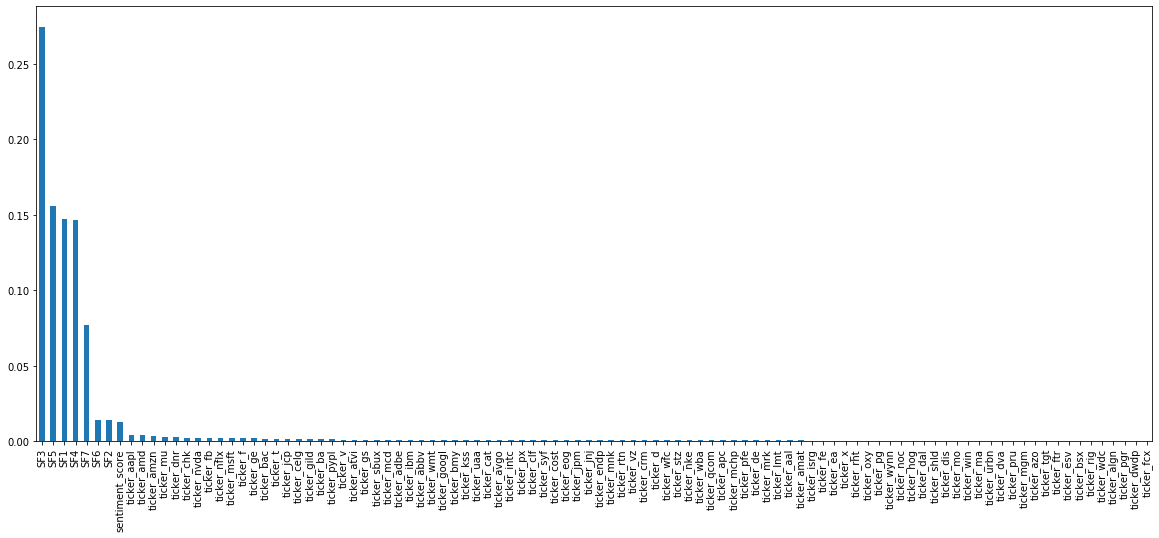

In [733]:
plt.subplots(figsize=(20,8))
importances.plot(kind='bar')

# Test Data Processing

In [185]:
import os
os.getcwd()

'C:\\Users\\AMAN\\Downloads\\New folder'

In [576]:

with open('C:\\Users\\AMAN\\Downloads\\New folder\\TestData-1573877469407\\TestData\\test_data.json') as json_file:
    test_retweet = json.load(json_file)

In [577]:
test_records = pd.DataFrame(test_retweet['records'])

In [578]:
test_records.head()

,stocktwit_tweet,ticker,timestamp
0,$CELG nothing to be exited about,$CELG,2018-10-25 14:26:16+00:00
1,$AMD yall exhaust your buyer on first green ca...,$AMD,2018-07-13 13:50:39+00:00
2,$AMD day traders day.,$AMD,2018-09-25 19:10:54+00:00
3,$CBS https://tenor.com/wLB8.gif,$CBS,2018-07-27 22:45:48+00:00
4,$MU weak price action so far today. Don’t be a...,$MU,2018-07-31 14:59:06+00:00


In [579]:
test_data = pd.read_csv("C:\\Users\\AMAN\\Downloads\\New folder\\TestData-1573877469407\\TestData\\test_factors.csv")
test_data.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7
0,270007,21/07/18,$INTC,-3.062194,1.223466,1.741714,2.279266,-1.323573,-0.274912,-4.504449
1,270008,05/10/18,$CTSH,0.816263,-2.184408,0.157975,-0.264743,-0.836282,0.046276,0.826353
2,270009,01/10/18,$CB,0.401281,0.091604,0.083411,-1.147041,-0.485223,-0.601060,1.012811
3,270010,24/10/18,$CTAS,-0.783521,1.192929,0.813831,-0.368166,-1.113656,-0.553581,-0.683803
4,270011,27/07/18,$intc,0.796507,0.455341,0.679032,0.354336,-1.799055,0.126153,0.297111


In [581]:
test_records['stocktwit_tweet'] = [entry.lower() for entry in test_records['stocktwit_tweet']]

In [582]:
test_records['stocktwit_tweet'] = [expand_contractions(re.sub('’', "'", text)) for text in test_records['stocktwit_tweet']]

In [583]:
test_records['ticker'] = test_records['ticker'].str.replace('\W', '')
test_records['ticker']= [text.lower() for text in test_records['ticker']]

In [584]:
test_records['stocktwit_tweet'] = [scrub_words(text) for text in test_records['stocktwit_tweet']]

In [585]:
test_records['stocktwit_tweet']=test_records['stocktwit_tweet'].apply(remove_stopwords)

In [586]:
test_records['stocktwit_tweet'] = test_records['stocktwit_tweet'].apply(lambda x: x.split())

In [587]:
test_records['stocktwit_tweet'] = test_records['stocktwit_tweet'].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

In [588]:
test_records['stocktwit_tweet'] = test_records['stocktwit_tweet'].apply(lambda x: ' '.join(x))


# sentiment prediction on test data

In [589]:
test_tweets = np.array(test_records['stocktwit_tweet'])
#test_sentiments = np.array(test_records['sentiment_score'])

In [590]:
test_X = tokenizer.texts_to_sequences(test_tweets)

In [595]:
test_X = pad_sequences(test_X,maxlen=91)
test_X.shape

(265022, 91)

In [596]:
#test_sentiment_dum = to_categorical(sentiments)
#test_sentiment_dum

In [597]:
test_sent_pred = model.predict_classes(test_X)

In [598]:
test_sent_pred[:-10]

array([2, 4, 2, ..., 2, 4, 1], dtype=int64)

In [599]:
test_sent_pred2 = model2.predict_classes(test_X)

In [600]:
test_sent_pred2

array([2, 4, 2, ..., 2, 2, 4], dtype=int64)

# Final test data

In [601]:
test_records.shape

(265022, 3)

In [602]:
test_records_copy = test_records.copy()

In [603]:
test_data_copy = test_data.copy()

In [604]:
test_records_copy['date'] = test_records_copy['timestamp'].apply(lambda x: x.split()[0])

In [605]:
test_records_copy['date'] = pd.to_datetime(test_records_copy['date'])
test_data_copy['date'] = pd.to_datetime(test_data_copy['date'])

In [624]:
test_records_copy['year'] = pd.DataFrame(test_records_copy['date'].dt.year)
test_records_copy['month'] = pd.DataFrame(test_records_copy['date'].dt.month)
test_records_copy['day'] = pd.DataFrame(test_records_copy['date'].dt.day)
test_data_copy['year'] = pd.DataFrame(test_data_copy['date'].dt.year)
test_data_copy['month'] = pd.DataFrame(test_data_copy['date'].dt.month)
test_data_copy['day'] = pd.DataFrame(test_data_copy['date'].dt.day)

In [626]:
test_data_copy['ticker'] = test_data_copy['ticker'].str.replace('\W', '')
test_data_copy['ticker']= [text.lower() for text in test_data_copy['ticker']]
test_data_copy.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,year,month,day
0,270007,2018-07-21,intc,-3.062194,1.223466,1.741714,2.279266,-1.323573,-0.274912,-4.504449,2018,7,21
1,270008,2018-05-10,ctsh,0.816263,-2.184408,0.157975,-0.264743,-0.836282,0.046276,0.826353,2018,5,10
2,270009,2018-01-10,cb,0.401281,0.091604,0.083411,-1.147041,-0.485223,-0.601060,1.012811,2018,1,10
3,270010,2018-10-24,ctas,-0.783521,1.192929,0.813831,-0.368166,-1.113656,-0.553581,-0.683803,2018,10,24
4,270011,2018-07-27,intc,0.796507,0.455341,0.679032,0.354336,-1.799055,0.126153,0.297111,2018,7,27


In [628]:
test_records_copy['sentiment_score'] = test_sent_pred2
test_records_copy.head()

,stocktwit_tweet,ticker,timestamp,date,year,month,day,sentiment_score
0,nothing exited,celg,2018-10-25 14:26:16+00:00,2018-10-25,2018,10,25,2
1,yall exhaust buyer first green candle byeeeeee,amd,2018-07-13 13:50:39+00:00,2018-07-13,2018,7,13,4
2,day trader day,amd,2018-09-25 19:10:54+00:00,2018-09-25,2018,9,25,2
3,,cbs,2018-07-27 22:45:48+00:00,2018-07-27,2018,7,27,2
4,weak price action far today afraid go short go...,mu,2018-07-31 14:59:06+00:00,2018-07-31,2018,7,31,0


In [629]:
test_sent_score = []

for i in range(test_data_copy.shape[0]):
    
    local_df_test = test_records_copy.loc[(test_records_copy['day'] == test_data_copy['day'][i]) & 
                                    (test_records_copy['month'] == test_data_copy['month'][i]) & 
                                    (test_records_copy['ticker'] == test_data_copy['ticker'][i])]
    
    test_sent_score.append(round(local_df_test['sentiment_score'].sum()/local_df_test.shape[0]))
    
test_data_copy['sentiment_score'] = test_sent_score

In [630]:
test_data_copy.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,year,month,day,sentiment_score
0,270007,2018-07-21,intc,-3.062194,1.223466,1.741714,2.279266,-1.323573,-0.274912,-4.504449,2018,7,21,3.0
1,270008,2018-05-10,ctsh,0.816263,-2.184408,0.157975,-0.264743,-0.836282,0.046276,0.826353,2018,5,10,NaN
2,270009,2018-01-10,cb,0.401281,0.091604,0.083411,-1.147041,-0.485223,-0.601060,1.012811,2018,1,10,NaN
3,270010,2018-10-24,ctas,-0.783521,1.192929,0.813831,-0.368166,-1.113656,-0.553581,-0.683803,2018,10,24,2.0
4,270011,2018-07-27,intc,0.796507,0.455341,0.679032,0.354336,-1.799055,0.126153,0.297111,2018,7,27,2.0


In [631]:
test_data_copy.dtypes

Id                          int64
date               datetime64[ns]
ticker                     object
SF1                       float64
SF2                       float64
SF3                       float64
SF4                       float64
SF5                       float64
SF6                       float64
SF7                       float64
year                        int64
month                       int64
day                         int64
sentiment_score           float64
dtype: object

In [635]:
test_data_copy.isnull().sum()

Id                 0
date               0
ticker             0
SF1                0
SF2                0
SF3                0
SF4                0
SF5                0
SF6                0
SF7                0
year               0
month              0
day                0
sentiment_score    0
dtype: int64

In [634]:
test_data_copy['sentiment_score'] = test_data_copy['sentiment_score'].fillna(test_data_copy['sentiment_score'].mode()[0])

In [636]:
test_data_copy['sentiment_score'] = test_data_copy['sentiment_score'].astype('int')

In [637]:
test_data_copy.drop(['Id','date','day','month','year'],axis = 1,inplace = True)

In [638]:
test_data_copy['ticker'] = test_data_copy['ticker'].astype('category')


In [639]:
dummy_test_data = pd.get_dummies(test_data_copy)

In [647]:
dummy_test_data.shape

(11575, 881)

In [645]:
dummy_test_data = dummy_test_data.reindex(columns = dummy_data.columns, fill_value=0)

In [649]:
test_df = dummy_test_data.drop(columns='alpha')


# Final prediction on test data

In [651]:
final_pred = clf_grid.predict(test_df)

In [667]:
final_pred_3029 = best_xgb_model2.predict(test_df)

In [668]:
final_pred_3029 = {'Id': test_data['Id'], 'alpha': final_pred_3029}
final_pred_3029 = pd.DataFrame(final_pred_3029)

In [670]:
final_pred_3029.to_csv('final_prediction_xgb1.csv', index = False)